# Sample Efficiency Test

Test the generalization of the `track-mjx` by varying the ratio between the training data and the separate hold out test set data

In [8]:


import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
# Apply the default Seaborn style
# Or, specify a particular Seaborn style
sns.set_style("whitegrid")

import numpy as np
import re


def parse_data(raw_data):
    data = {}
    for line in raw_data:
        parts = line.split("\t")
        key = re.search(r"rodent-SE-([0-9]+(?:\.[0-9]+)?)", parts[0]).group(1)
        value = float(parts[1])
        data[key] = value
    return data


def plot_data(data):
    keys = list(data.keys())
    values = list(data.values())

    # Convert keys to integers
    keys = [float(k) for k in keys]

    # Sort the data by keys
    sorted_indices = np.argsort(keys)
    keys = np.array(keys)[sorted_indices]
    values = np.array(values)[sorted_indices]

    plt.plot(keys, values, marker="o")
    plt.xticks(keys, labels=keys)
    plt.xlabel("Ratio of the training set")
    plt.ylabel("Testset Rewards")
    plt.title("SE-Exp1: 10% hold out testset")
    plt.grid(True)
    plt.show()

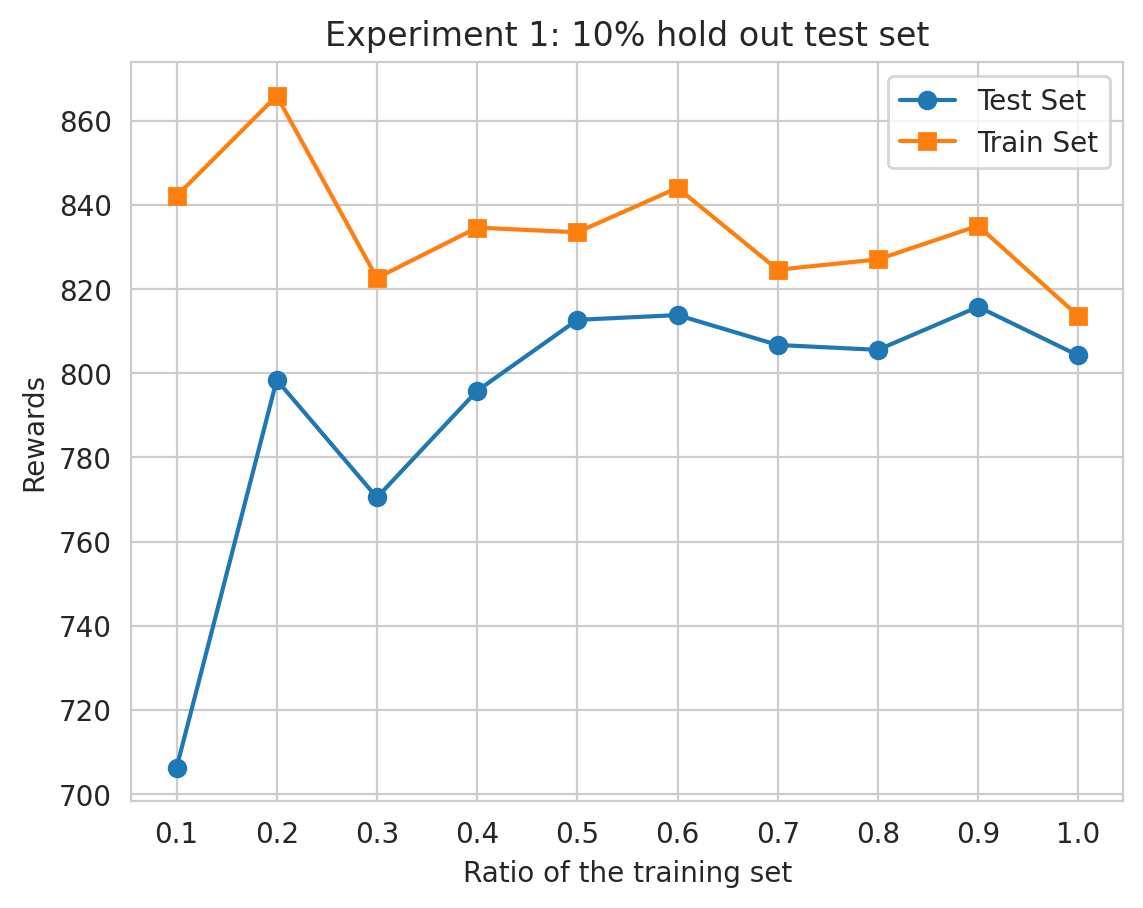

In [9]:
test_set_reward = """rodent-SE-0.9	815.7948973318224
rodent-SE-0.6	813.8262952715866
rodent-SE-0.5	812.6940756247837
rodent-SE-0.7	806.7243039057103
rodent-SE-0.8	805.5683700370254
rodent-SE-1.0	804.2270686128951
rodent-SE-0.2	798.4131041957371
rodent-SE-0.4	795.8344058666644
rodent-SE-0.3	770.490572555855
rodent-SE-0.1	706.2542128695958""".splitlines()

train_set_reward = """rodent-SE-0.2	865.9174260485581
rodent-SE-0.6	844.0473599893647
rodent-SE-0.1	842.1254403219936
rodent-SE-0.9	835.0417281389028
rodent-SE-0.4	834.6098647258887
rodent-SE-0.5	833.5012660301337
rodent-SE-0.8	827.0605002679456
rodent-SE-0.7	824.6069501471347
rodent-SE-0.3	822.630959195811
rodent-SE-1.0	813.6031102931806
""".splitlines()

# parse the raw data strings into dictionaries
test_data = parse_data(test_set_reward)
train_data = parse_data(train_set_reward)

# collect and sort all unique ratios
ratios = sorted(
    {float(k) for k in test_data.keys()} | {float(k) for k in train_data.keys()}
)

# plot both test and train rewards
plt.plot(
    ratios,
    [test_data.get(f"{r}", np.nan) for r in ratios],
    marker="o",
    label="Test Set",
)
plt.plot(
    ratios,
    [train_data.get(f"{r}", np.nan) for r in ratios],
    marker="s",
    label="Train Set",
)

plt.xticks(ratios, labels=ratios)
plt.xlabel("Ratio of the training set")
plt.ylabel("Rewards")
plt.title("Experiment 1: 10% hold out test set")
plt.legend()
plt.grid(True)
plt.show()

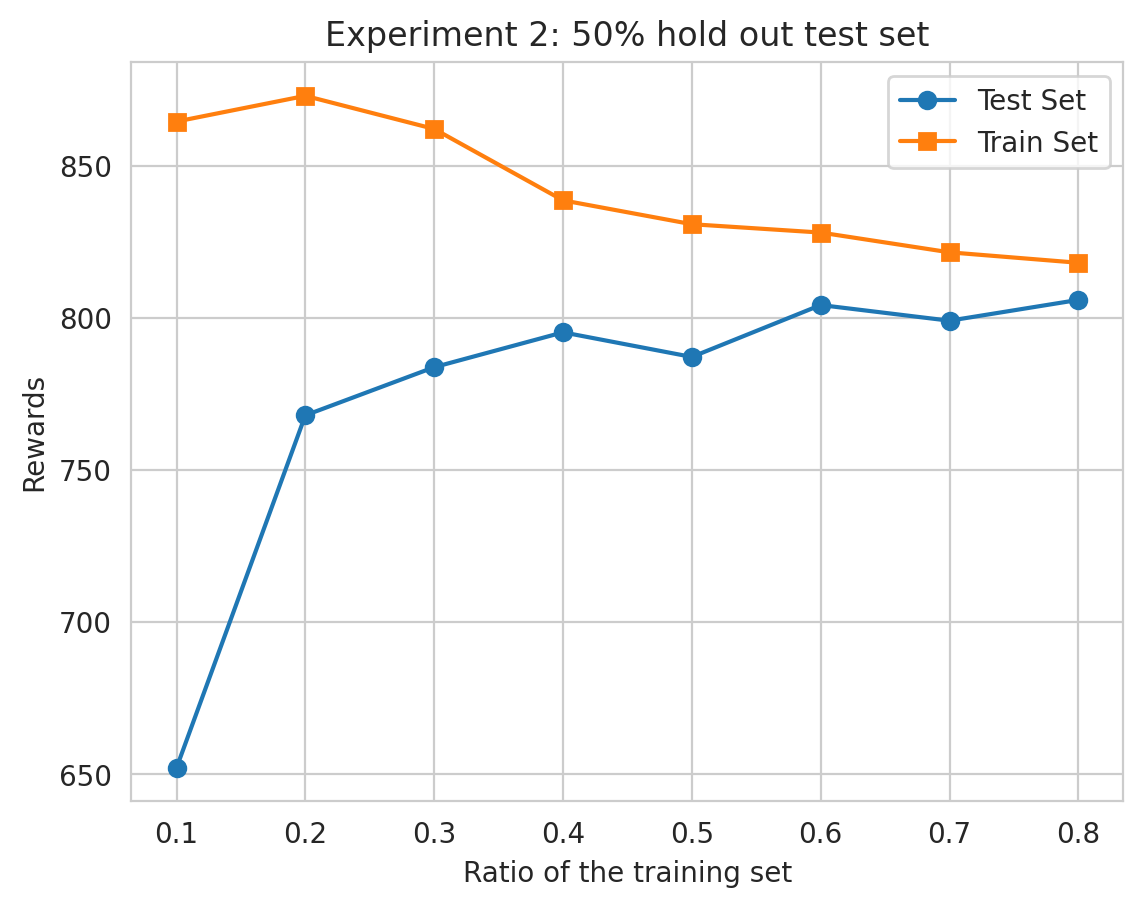

In [13]:
test_set_reward = """rodent-SE-half-test-ratio-0.80_250410_214054	805.898581895181
rodent-SE-half-test-ratio-0.60_250410_214009	804.2077261839679
rodent-SE-half-test-ratio-0.70_250410_214035	799.0593153007187
rodent-SE-half-test-ratio-0.40_250410_213900	795.2349720400886
rodent-SE-half-test-ratio-0.50_250410_213952	787.1406366138575
rodent-SE-half-test-ratio-0.30_250410_213843	783.774696215254
rodent-SE-half-test-ratio-0.20_250410_213821	767.951900129765
rodent-SE-half-test-ratio-0.10_250410_213757	652.0546824077281""".splitlines()

train_set_reward = """rodent-SE-half-test-ratio-0.20_250410_213821	872.9852521455015
rodent-SE-half-test-ratio-0.10_250410_213757	864.5360230875997
rodent-SE-half-test-ratio-0.30_250410_213843	862.095462757802
rodent-SE-half-test-ratio-0.40_250410_213900	838.6289508674399
rodent-SE-half-test-ratio-0.50_250410_213952	830.7788000015191
rodent-SE-half-test-ratio-0.60_250410_214009	828.0372066060224
rodent-SE-half-test-ratio-0.70_250410_214035	821.5389757349222
rodent-SE-half-test-ratio-0.80_250410_214054	818.1070809912679
""".splitlines()


def parse_data(raw_data):
    data = {}
    for line in raw_data:
        parts = line.split("\t")
        key = re.search(
            r"rodent-SE-half-test-ratio-([0-9]+(?:\.[0-9]+)?)", parts[0]
        ).group(1)
        value = float(parts[1])
        data[key] = value
    return data


# parse the raw data strings into dictionaries
test_data = parse_data(test_set_reward)
train_data = parse_data(train_set_reward)

# collect and sort all unique ratios
ratios = sorted(
    {float(k) for k in test_data.keys()} | {float(k) for k in train_data.keys()}
)

# plot both test and train rewards
plt.plot(
    ratios,
    [test_data.get(f"{r:.2f}", np.nan) for r in ratios],
    marker="o",
    label="Test Set",
)
plt.plot(
    ratios,
    [train_data.get(f"{r:.2f}", np.nan) for r in ratios],
    marker="s",
    label="Train Set",
)

plt.xticks(ratios, labels=ratios)
plt.xlabel("Ratio of the training set")
plt.ylabel("Rewards")
plt.title("Experiment 2: 50% hold out test set")
plt.legend()
plt.grid(True)
plt.show()

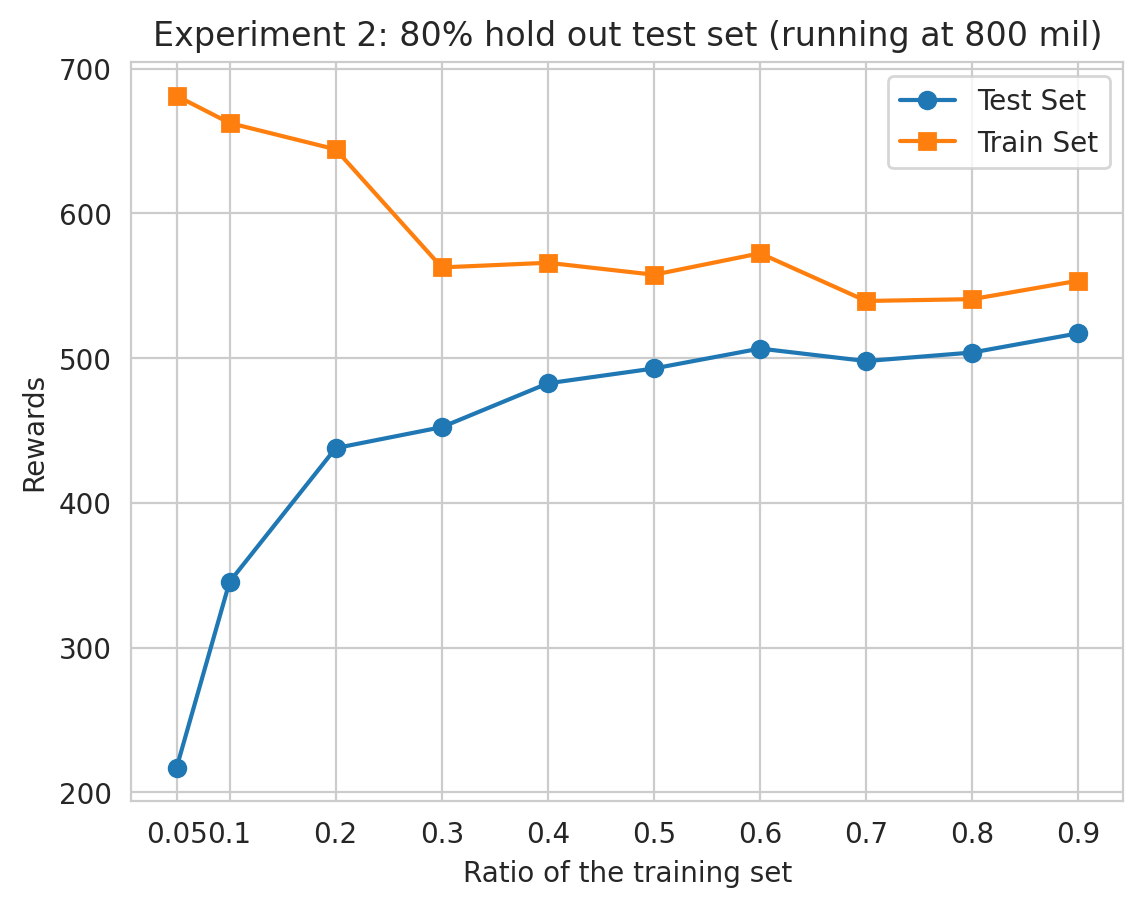

In [15]:
test_set_reward = """R-SE-0.90_exp3_80test_250416_181427	517.1817233356857
R-SE-0.60_exp3_80test_250416_181348	506.6243667953051
R-SE-0.80_exp3_80test_250416_181419	503.9023849485714
R-SE-0.70_exp3_80test_250416_181404	497.9894530306516
R-SE-0.50_exp3_80test_250416_181117	492.8741719084065
R-SE-0.40_exp3_80test_250416_181059	482.60299086378944
R-SE-0.30_exp3_80test_250416_181046	452.3091424133136
R-SE-0.20_exp3_80test_250416_181033	437.81647741134856
R-SE-0.10_exp3_80test_250416_180111	345.4184011818924
R-SE-0.05_exp3_80test_250416_180048	216.87140119071995""".splitlines()

train_set_reward = """R-SE-0.05_exp3_80test_250416_180048	681.2795926522653
R-SE-0.10_exp3_80test_250416_180111	662.5160902438905
R-SE-0.20_exp3_80test_250416_181033	644.3011461750327
R-SE-0.60_exp3_80test_250416_181348	572.4683101513036
R-SE-0.40_exp3_80test_250416_181059	565.9193970309635
R-SE-0.30_exp3_80test_250416_181046	562.7143486860128
R-SE-0.50_exp3_80test_250416_181117	557.6577120693179
R-SE-0.90_exp3_80test_250416_181427	553.5388206083793
R-SE-0.80_exp3_80test_250416_181419	540.7767278116086
R-SE-0.70_exp3_80test_250416_181404	539.5219752337313
""".splitlines()


def parse_data(raw_data):
    data = {}
    for line in raw_data:
        parts = line.split("\t")
        key = re.search(r"R-SE-([0-9]+(?:\.[0-9]+)?)", parts[0]).group(1)
        value = float(parts[1])
        data[key] = value
    return data


# parse the raw data strings into dictionaries
test_data = parse_data(test_set_reward)
train_data = parse_data(train_set_reward)

# collect and sort all unique ratios
ratios = sorted(
    {float(k) for k in test_data.keys()} | {float(k) for k in train_data.keys()}
)

# plot both test and train rewards
plt.plot(
    ratios,
    [test_data.get(f"{r:.2f}", np.nan) for r in ratios],
    marker="o",
    label="Test Set",
)
plt.plot(
    ratios,
    [train_data.get(f"{r:.2f}", np.nan) for r in ratios],
    marker="s",
    label="Train Set",
)

plt.xticks(ratios, labels=ratios)
plt.xlabel("Ratio of the training set")
plt.ylabel("Rewards")
plt.title("Experiment 2: 80% hold out test set (running at 800 mil)")
plt.legend()
plt.grid(True)
plt.show()